# Fitting data and predictions
In this notebook, the total number of cases in Italy are fitted with an exponential and with a quadratic function, in order to build a model that can be used to predict the number of cases in the (near) future.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('ggplot')

from src.data.read_dataset import get_processed_dataset

In [2]:
df = get_processed_dataset('dpc_nazionale')
start_date = "2020-02-24"
ydata = df[df.data > start_date].totale_casi.tolist()
ydata[-3:]

[135586, 139422, 143626]

In [3]:
def covid_fit(ydata, f, label):
    xdata = np.arange(len(ydata))
    popt, pcov = curve_fit(f,xdata=xdata,ydata=ydata)
    perr = np.sqrt(np.diag(pcov))
    fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    xpred = np.arange(len(ydata) + 3)
    ypred = f(xpred, *popt)
    yfit = f(xdata, *popt)
    perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in Italy')
    ax1.plot(ydata,'--o',label='Real Data')
    ax1.plot(xpred,ypred,'-',label=f'{label} fit')
    ax2.plot(xdata[1:],perc,'--o',label='Real Data')
    ax2.plot(xdata[1:],perc_fit,'--o',label=f'{label} fit')
    ax2.set_ylabel('Daily relative increment')
    ax2.set_xlabel('Date')
    ax1.legend()
    ax2.legend()
    plt.show()
    
    ss_res = np.sum(np.power(yfit - ydata, 2))
    yavg = np.mean(ydata)
    ss_tot = np.sum(np.power(ydata - yavg, 2))
    return (popt, 1 - ss_res / ss_tot, ypred[-4:])

## Fitting with exponential function
Data is fitted to the function
$$f(x) = a \cdot 2^{t/b} $$ 

In the legend below, the doubling time is also reported, i.e. the number of days needed to double the cases.


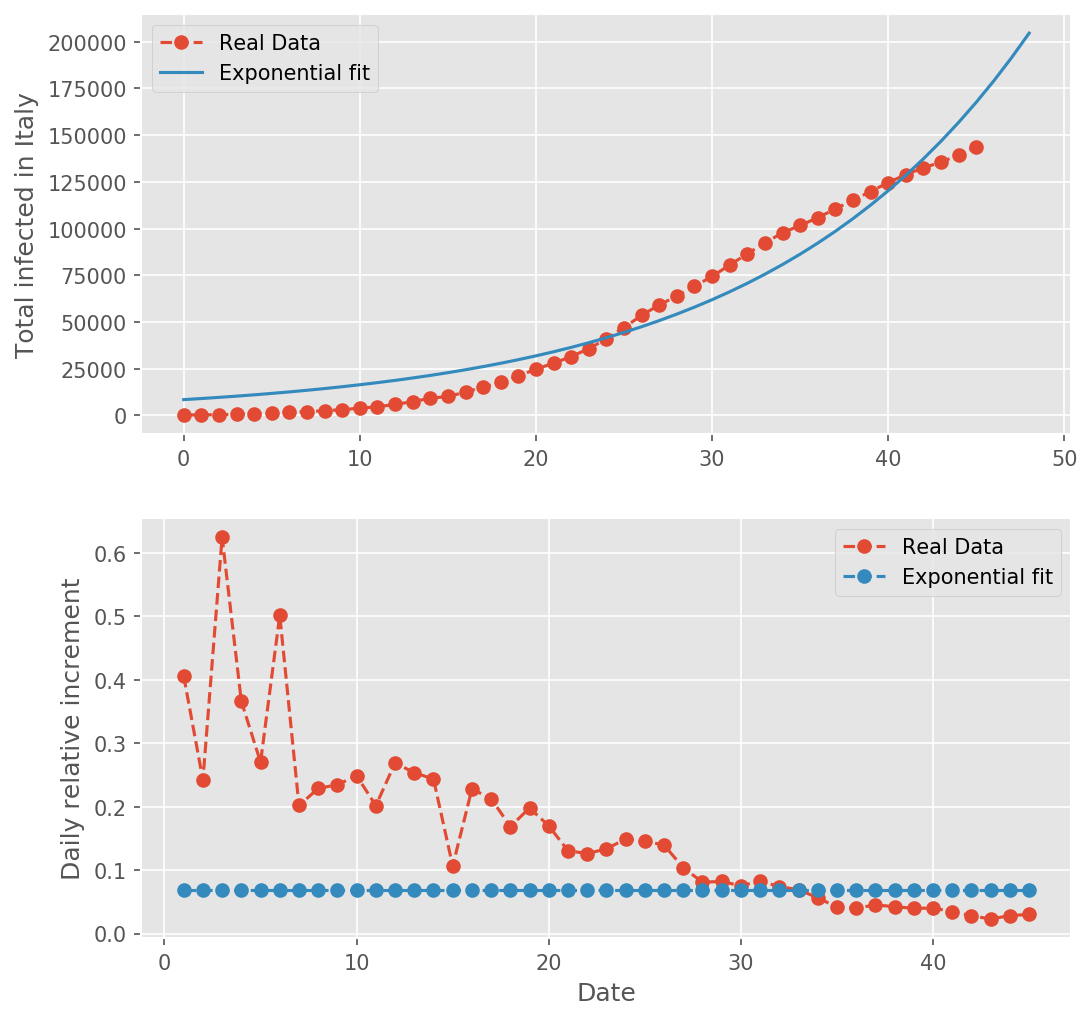

Doubling time:  10.44
R2:  0.9464
Projection:  167655, 179162, 191459, 204600


In [4]:
popt, r2, ypred = covid_fit(ydata, f=lambda t,a,b: a*2**(t/b), label='Exponential')
print("Doubling time: ", round(popt[1], 2))
print("R2: ", round(r2, 4))
print("Projection: ", ', '.join(str(int(n)) for n in ypred))

## Fitting with quadratic function
Data is fitted to the function
$$f(x) = a t^2 + bt + c $$ 

This function has been shown to yield good results with the data coming from China.

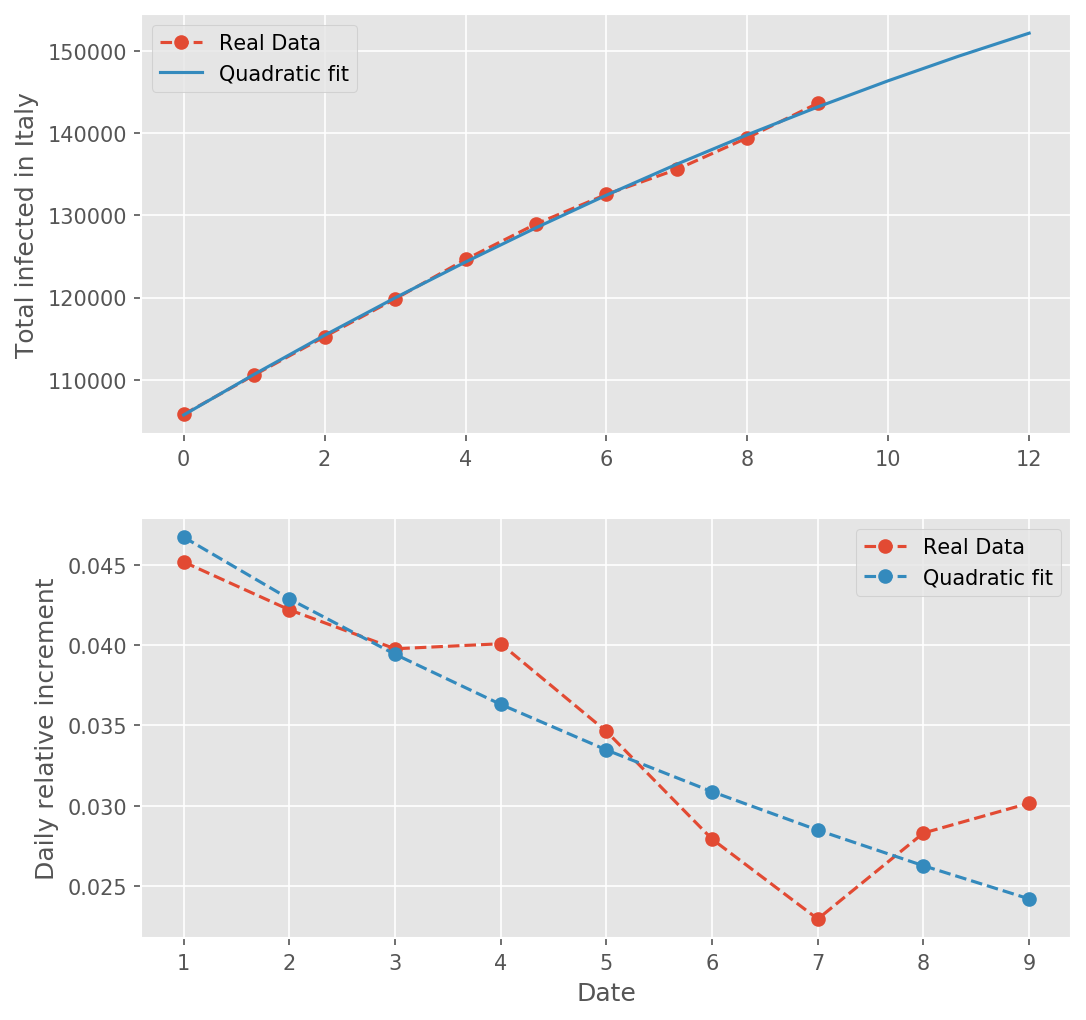

R2:  0.9992
Projection:  143174, 146360, 149350, 152144


In [5]:
popt, r2, ypred = covid_fit(ydata[-10:], f=lambda t,a,b,c: a*t**2+b*t+c, label='Quadratic')
print("R2: ", round(r2, 4))
print("Projection: ", ', '.join(str(int(n)) for n in ypred))